tb - The goal is to rigorously compare the differint Python package to Sara Shamekh's functions to calculate fractional derivatives. We will compare the results, accuracy, and calculation time.

# Imports

In [1]:
import differint.differint as df
from Sara_Shamekh_fractionals import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from math import gamma
from time import time

In [2]:
fz = 15
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw

## Test on very simple function following the differint paper

### $x^{power}$

In [51]:
Npoints = 250

In [105]:
domain = np.linspace(0.01,1,Npoints)

In [106]:
power = 2

In [107]:
sqrt = domain**power

In [108]:
order = 0.25

In [109]:
df.RL

<function differint.differint.RL(alpha, f_name, domain_start=0.0, domain_end=1.0, num_points=100)>

In [110]:
if order<1:
    t0 = time()
    d_0p5_sqrt_RL = df.RL(order,sqrt,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
    t1 = time()
    print('df RL='+str((t1-t0))+'s')

df RL=0.025192975997924805s


In [111]:
if order>=1:
    t0 = time()
    d_0p5_sqrt_GL = df.GL(order,sqrt,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
    t1 = time()
    print('df GL='+str((t1-t0))+'s')

In [112]:
t0 = time()
d_0p5_sqrt_GLI = df.GLI(order,sqrt,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
t1 = time()
print('df GLI='+str((t1-t0))+'s')

df GLI=0.001974344253540039s


In [113]:
if order<=0:
    t0 = time()
    d_0p5_sqrt_SS_RL_left = RL_left_integral(np.expand_dims(sqrt,0),domain[1]-domain[0],-order)
    t1 = time()

    print('SS RL='+str((t1-t0))+'s')

In [114]:
# if order<=-1:
#     t0 = time()
#     d_0p5_sqrt_SS_RL_right = -RL_right_integral(np.expand_dims(sqrt,0),domain[1]-domain[0],-order)
#     t1 = time()
#     d_0p5_sqrt_SS_RL_right -= d_0p5_sqrt_SS_RL_right[0,0]

#     print('SS RL='+str((t1-t0))+'s')

In [115]:
# d_0p5_sqrt_SS_GL_left = np.zeros(Npoints,)

# t0 = time()
# for i in range(Npoints):
#     d_0p5_sqrt_SS_GL_left[i] = GL_left(np.expand_dims(sqrt[i:],0),order,domain[1]-domain[0])
# t1 = time()
# print('SS RL='+str((t1-t0))+'s')

In [116]:
if order>=0:
    d_0p5_sqrt_SS_GL_right = np.zeros(Npoints,)

    t0 = time()
    for i in range(Npoints):
        d_0p5_sqrt_SS_GL_right[i] = GL_right(np.expand_dims(sqrt[:(i+1)],0),order,domain[1]-domain[0])
    t1 = time()
    print('SS RL='+str((t1-t0))+'s')

SS RL=0.9213416576385498s


In [117]:
# if order==0.5: solution = gamma(1.5)*(domain**0)
# elif order==-1: solution = (domain**1.5)/1.5
# elif order==-1.5: solution = gamma(1.5)/gamma(3)*(domain**2)
# elif order==-2: solution = (domain**2.5)/(2.5*1.5)
# elif order==1: solution = 0.5*(domain**(-0.5))
# elif order==2: solution = 0.5*(-0.5)*(domain**(-1.5))
# elif order==0: solution = sqrt
if (1+power-order)>0: solution = (domain)**(power-order)*gamma(1+power)/gamma(1+power-order)
else: solution = np.nan*domain

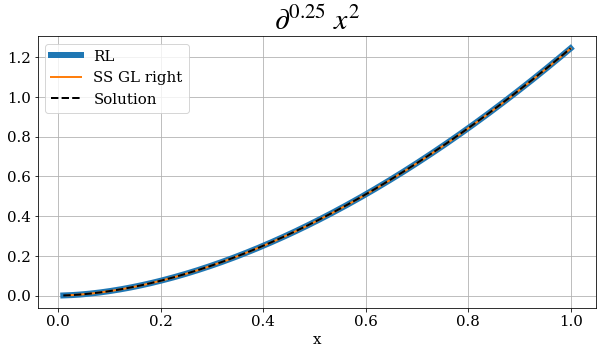

In [118]:
plt.figure(figsize=(10,5))

if order<1: plt.plot(domain,d_0p5_sqrt_RL,label='RL',linewidth=1.5*lw)
else: plt.plot(domain[2:],d_0p5_sqrt_GL[2:],label='GL',linewidth=0.75*lw)    
#plt.plot(domain,d_0p5_sqrt_GLI,label='GLI')

if order<=0: plt.plot(domain,d_0p5_sqrt_SS_RL_left[0,:],label='SS RL left')
#if order<=-1: plt.plot(domain,d_0p5_sqrt_SS_RL_right[0,:],label='SS RL right',linewidth=0.5*lw)
#plt.plot(domain,d_0p5_sqrt_SS_GL_left,label='SS GL left')
if order>=0: plt.plot(domain[2:],d_0p5_sqrt_SS_GL_right[2:],label='SS GL right',linewidth=0.5*lw)
plt.plot(domain,solution,linewidth=lw/2,linestyle='--',color='k',label='Solution')
plt.grid()
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim((np.min(solution[1:])-1,1+np.max(solution[1:])))
#plt.ylim((0.6,1.5))

plt.xlabel('x')
if order!=0: plt.title(r'$\partial^{'+str(order)+'}\ x^{'+str(power)+'}$',fontsize=2*fz)
else: plt.title(r'$\partial^{'+str(0)+'}\ x^{'+str(power)+'}$')

## $\exp(\lambda \times x)$

In [73]:
from scipy.special import gammainc
from scipy.special import expn
from scipy.special import erf

df GLI=0.00040149688720703125s
df GLI=0.0033316612243652344s
SS RL=1.0181725025177002s
order= 1.65  so (1-order)= -0.6499999999999999 <=0


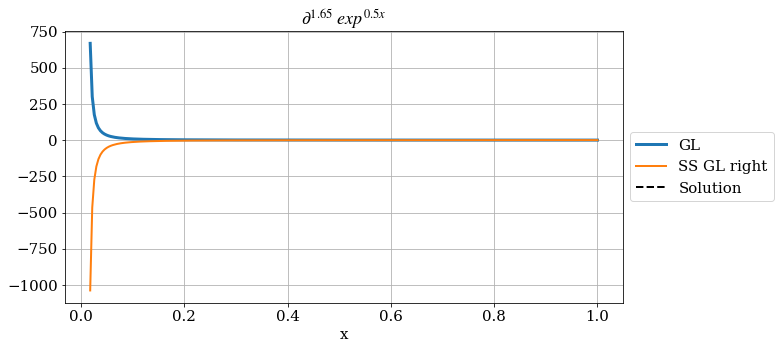

In [91]:
Npoints = 250

domain = np.linspace(0.01,1,Npoints)

lamb = 0.5

fx = np.exp(lamb*domain)

order = 1.65

#df.RL

if order<1:
    t0 = time()
    d_0p5_sqrt_RL = df.RL(order,fx,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
    t1 = time()
    print('df RL='+str((t1-t0))+'s')

if order>=1:
    t0 = time()
    d_0p5_sqrt_GL = df.GL(order,fx,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
    t1 = time()
    print('df GLI='+str((t1-t0))+'s')

t0 = time()
d_0p5_sqrt_GLI = df.GLI(order,fx,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
t1 = time()
print('df GLI='+str((t1-t0))+'s')

if order<=0:
    t0 = time()
    d_0p5_sqrt_SS_RL_left = RL_left_integral(np.expand_dims(fx,0),domain[1]-domain[0],-order)
    t1 = time()

    print('SS RL='+str((t1-t0))+'s')

if order>=0:
    d_0p5_sqrt_SS_GL_right = np.zeros(Npoints,)

    t0 = time()
    for i in range(Npoints):
        d_0p5_sqrt_SS_GL_right[i] = GL_right(np.expand_dims(fx[:(i+1)],0),order,domain[1]-domain[0])
    t1 = time()
    print('SS RL='+str((t1-t0))+'s')

if (1-order)>0: solution = lamb**order/gamma(1-order)*\
    ((lamb*domain)**(-order)+np.exp(lamb*domain)*\
    (gamma(1-order)-gammainc(lamb*domain,1-order)))
#if order==0.5 and lamb==1: solution = np.exp(domain)*erf(np.sqrt(domain))
else: solution = np.nan*domain; print('order=',str(order),' so (1-order)=',str(1-order),'<=0')
# n = np.ceil(order)
# k = np.arange(0,10)
# solution = np.zeros_like(domain)
# for i in range(np.size(domain)):
#     solution_tmp = np.zeros(np.size(k))
#     for j in range(np.size(k)):
#         solution_tmp[k] = (lamb**(k[j]+n) * domain[i]**(k[j]+n-order))/(gamma(k[j]+1+n-order))
#     solution[i] = np.sum(solution_tmp)

plt.figure(figsize=(10,5))

if order<1: plt.plot(domain,d_0p5_sqrt_RL,label='RL',linewidth=1.5*lw)
else: plt.plot(domain[2:],d_0p5_sqrt_GL[2:],label='GL',linewidth=0.75*lw)    
#plt.plot(domain,d_0p5_sqrt_GLI,label='GLI')

if order<=0: plt.plot(domain,d_0p5_sqrt_SS_RL_left[0,:],label='SS RL left')
#if order<=-1: plt.plot(domain,d_0p5_sqrt_SS_RL_right[0,:],label='SS RL right',linewidth=0.5*lw)
#plt.plot(domain,d_0p5_sqrt_SS_GL_left,label='SS GL left')
if order>=0: plt.plot(domain[2:],d_0p5_sqrt_SS_GL_right[2:],label='SS GL right',linewidth=0.5*lw)
plt.plot(domain,solution,linewidth=lw/2,linestyle='--',color='k',label='Solution')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim((np.min(solution[1:])-1,1+np.max(solution[1:])))
#plt.ylim((-10,10))

plt.xlabel('x')
plt.title(r'$\partial^{'+str(order)+'}\ exp^{'+str(lamb)+'x}$');

In [52]:
domain[i]**(k[j]+n-order)

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [64]:
domain.shape

(250,)

In [61]:
solution = np.zeros_like(np.size(domain))

In [62]:
solution.shape

()

In [49]:
k[j]+n-order

9.5

In [53]:
gamma(k[j]+1+n-order)

1133278.3889487854

In [55]:
domain[i]**(k[j]+n-order)

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [59]:
np.sum(solution_tmp)

nan

In [57]:
solution

array(0)